In [1]:
# Let's start by loading the diabetes dataset from sklearn, then convert it to a pandas DataFrame for exploratory data analysis (EDA).

import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns

# Load diabetes dataset
diabetes = load_diabetes()

# Convert to DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # Add target variable to the dataframe

# Show basic information about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


(None,
         age       sex       bmi        bp        s1        s2        s3  \
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 
          s4        s5        s6  target  
 0 -0.002592  0.019907 -0.017646   151.0  
 1 -0.039493 -0.068332 -0.092204    75.0  
 2 -0.002592  0.002861 -0.025930   141.0  
 3  0.034309  0.022688 -0.009362   206.0  
 4 -0.002592 -0.031988 -0.046641   135.0  )

In [6]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [8]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shapes of the train and test sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (353, 10)
Testing set size: (89, 10)


In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform test data using the already fitted scaler

# Check the transformation by displaying the first few rows of the scaled data

pd.DataFrame(X_train_scaled, columns=X_train.columns).head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,1.498365,1.061370,0.219902,1.138874,0.728473,1.055893,-0.824451,0.711038,0.547482,-0.061449
1,-0.228858,1.061370,-0.419366,-0.710591,-0.424929,0.272425,-1.529791,1.484286,-0.019757,0.367236
2,0.085182,-0.942179,1.018987,1.992473,-0.309589,-0.326699,-0.119111,-0.062210,0.331237,-0.318660
3,-0.621409,-0.942179,-0.784662,-0.639458,-1.174640,-1.215508,0.664600,-0.835458,-1.069682,-2.719299
4,-0.542899,-0.942179,-1.423930,-1.706457,-0.799784,-1.110167,1.291569,-1.608706,-0.802859,-0.918820


In [11]:
X_train_scaled

array([[ 1.49836523,  1.06136988,  0.21990201, ...,  0.71103773,
         0.54748197, -0.06144896],
       [-0.22885822,  1.06136988, -0.41936607, ...,  1.4842858 ,
        -0.01975653,  0.36723647],
       [ 0.08518241, -0.94217861,  1.01898711, ..., -0.06221033,
         0.3312366 , -0.31866022],
       ...,
       [ 0.63475351, -0.94217861, -0.46502808, ..., -0.83545839,
        -0.25375196, -0.06144896],
       [-0.30736838, -0.94217861, -0.53352109, ..., -0.06221033,
        -0.83072436, -0.83308273],
       [-2.03459183, -0.94217861,  0.56236706, ..., -0.83545839,
        -0.13312789, -0.06144896]])

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score:", r2)

# Optional: Show the coefficients of the linear model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("\nModel Coefficients:\n", coefficients)


Mean Squared Error (MSE): 2900.193628493481
R-squared (R2) score: 0.4526027629719196

Model Coefficients:
      Coefficient
age     1.753758
sex   -11.511809
bmi    25.607121
bp     16.828872
s1    -44.448856
s2     24.640954
s3      7.676978
s4     13.138784
s5     35.161195
s6      2.351364


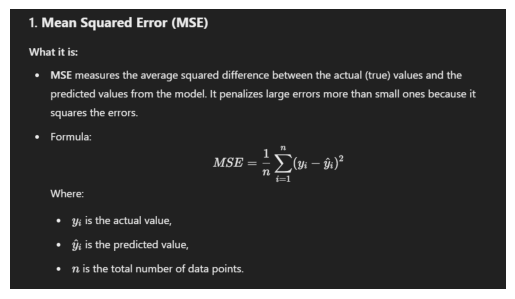

In [13]:
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('mse.png')  # Replace with your image file path

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

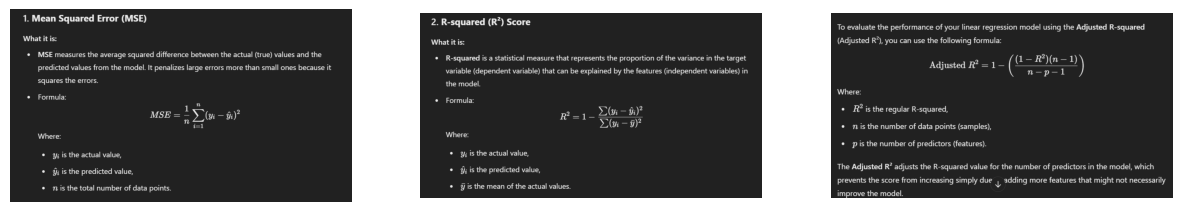

In [14]:
import matplotlib.image as mpimg
import os

# List the images you want to display
image_paths = ['mse.png', 'R2.png', 'Adj R2.png']  # Replace with your actual image paths

# Set up the figure and subplots
fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))

# Loop through each image path
for i, image_path in enumerate(image_paths):
    img = mpimg.imread(image_path)  # Read the image
    axes[i].imshow(img)  # Display the image
    axes[i].axis('off')  # Turn off axis labels

# Display the images
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test,y_pred)

# Output the results
print(f"Mean Squared Error (MSE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 42.79409467959992
Root Mean Squared Error (RMSE): 53.85344583676592


In [18]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Initialize models with a regularization parameter alpha
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train models
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
elasticnet.fit(X_train_scaled, y_train)

# Make predictions on test data
lasso_pred = lasso.predict(X_test_scaled)
ridge_pred = ridge.predict(X_test_scaled)
elasticnet_pred = elasticnet.predict(X_test_scaled)

# Calculate R-squared scores for each model using the .score() method
lasso_score = lasso.score(X_test_scaled, y_test)
ridge_score = ridge.score(X_test_scaled, y_test)
elasticnet_score = elasticnet.score(X_test_scaled, y_test)

# Calculate MSE, RMSE, MAE for each model
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, rmse, mae

# Evaluate each model
lasso_mse, lasso_rmse, lasso_mae = evaluate_model(y_test, lasso_pred)
ridge_mse, ridge_rmse, ridge_mae = evaluate_model(y_test, ridge_pred)
elasticnet_mse, elasticnet_rmse, elasticnet_mae = evaluate_model(y_test, elasticnet_pred)

# Display the results in a readable format
results = pd.DataFrame({
    'Model': ['Lasso', 'Ridge', 'ElasticNet'],
    'Score (R-squared)': [lasso_score, ridge_score, elasticnet_score],
    'MSE': [lasso_mse, ridge_mse, elasticnet_mse],
    'RMSE': [lasso_rmse, ridge_rmse, elasticnet_rmse],
    'MAE': [lasso_mae, ridge_mae, elasticnet_mae]
})

print(results)


        Model  Score (R-squared)          MSE       RMSE        MAE
0       Lasso           0.455541  2884.624289  53.708698  42.805234
1       Ridge           0.452818  2899.054556  53.842869  42.796235
2  ElasticNet           0.458970  2866.461255  53.539343  42.873332


In [21]:
model.score(X_test_scaled,y_test)

0.4526027629719196